## Predicting the Sale Price of Bull Dozers using Machine Learning

In this notebook, we are going to go through an example machine learning project with the goal of predicting the sale price of bulldozers

## 1. Problem Definition

## 2. Data

## 3.Evaluation

## 4. Features

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [7]:
df = pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv", low_memory= False)

In [8]:
df.head()


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [10]:
df.isna()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,True,True,True,True,True
412694,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,True,True,True,True,True
412695,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,True,True,True,True,True
412696,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,True,True,True,True,True


In [11]:
df.isna().sum()


SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

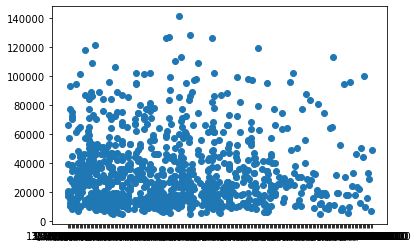

In [12]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

In [13]:
df.saledate[:100]

0     11/16/2006 0:00
1      3/26/2004 0:00
2      2/26/2004 0:00
3      5/19/2011 0:00
4      7/23/2009 0:00
           ...       
95    12/15/2005 0:00
96     1/29/2004 0:00
97     9/18/2008 0:00
98     11/3/2005 0:00
99      6/1/2006 0:00
Name: saledate, Length: 100, dtype: object

<AxesSubplot:ylabel='Frequency'>

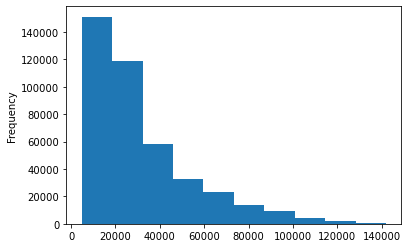

In [14]:
df.SalePrice.plot.hist()

### Parsing dates


When we work with time series data, we want to enrich the time and date
component as much as possible.

We can do that by telling pandas which of our columns has dates in it 
using the 'parse_dates' parameter

In [15]:
# Import data again but this time parse dates

df = pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv", low_memory = False, parse_dates = ["saledate"])


In [16]:
df.saledate.dtype

dtype('<M8[ns]')

In [17]:
df.saledate[:100]

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
        ...    
95   2005-12-15
96   2004-01-29
97   2008-09-18
98   2005-11-03
99   2006-06-01
Name: saledate, Length: 100, dtype: datetime64[ns]

In [18]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Sale Price')

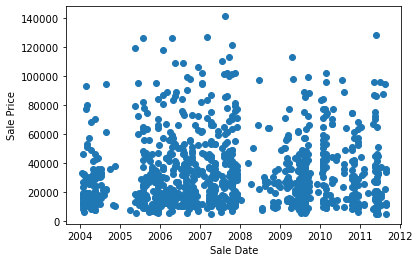

In [19]:
fig, ax = plt.subplots()

ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])
ax.set_xlabel('Sale Date')
ax.set_ylabel('Sale Price')

In [20]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df.head().T # We transposed the dataframe as all the coloumns were not visible

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [22]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

### Sort the DataFrame by saledate

When working with time series data, it's a good idea to sort it by date.

In [23]:
# Sort DataFrame in dateorder

df.sort_values(by = ["saledate"], inplace = True, ascending = True)

In [24]:
df.saledate.head(30)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
144032   1989-01-31
54438    1989-01-31
144952   1989-01-31
205752   1989-01-31
28927    1989-01-31
86971    1989-01-31
67034    1989-01-31
87602    1989-01-31
53101    1989-01-31
205784   1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make a copy of the original DataFrame

We make a copy of the original datframe so when we manipulate the copy, we have 
still got our original data.

In [25]:
# Make a copy

df_tmp = df.copy()

In [26]:
df_tmp.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [27]:
# Now if we make changes to df_tmp , those changes wont reflect in df

# Feature Engineering

### * Add datetime parameters for 'saledate' coloumn



In [28]:
df_tmp["SaleYear"] = df_tmp.saledate.dt.year
df_tmp["SaleMonth"] = df_tmp.saledate.dt.month
df_tmp["SaleDate"] = df_tmp.saledate.dt.day
df_tmp["SaleDayofWeek"] = df_tmp.saledate.dt.dayofweek
df_tmp["SaleDayofYear"] = df_tmp.saledate.dt.day_of_year

In [29]:
df_tmp.SaleYear.head(20)

205615    1989
274835    1989
141296    1989
212552    1989
62755     1989
54653     1989
81383     1989
204924    1989
135376    1989
113390    1989
113394    1989
116419    1989
32138     1989
127610    1989
76171     1989
127000    1989
128130    1989
127626    1989
55455     1989
55454     1989
Name: SaleYear, dtype: int64

In [30]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [31]:
# Now we have enriched our DataFrame with date time features, we can removes salesdate feature
df_tmp.drop("saledate", axis = 'columns' , inplace = True)

In [32]:
# Check the value of different coloumns

df_tmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virginia   

## 5. Modelling

We have done enough EDA (we could always do more)
but let's start to do some model driven EDA.


In [33]:
len(df_tmp)

412698

In [34]:
# Let's build a Machine Learning Model

In [35]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs = -1, random_state= 42)
model.fit(df_tmp.drop("SalePrice", axis = 'columns'), df_tmp["SalePrice"])

ValueError: could not convert string to float: 'Low'

### Convert string to categories

One way we can turn all of our data into numbers is by converting them
into pandas categories.



In [36]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [37]:
# Find the columns which contain strings

for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print( label )
        
    

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [38]:
# This will turn all of the string values into category values

for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [39]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [40]:
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [41]:
# Checking missing data

In [42]:
df_tmp.isnull().sum()/len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

## save preprocessed data


In [43]:
# Export current tmp dataframe

df_tmp.to_csv("bluebook-for-bulldozers/train_tmp.csv", index = False)

In [44]:
df_tmp = pd.read_csv("bluebook-for-bulldozers/train_tmp.csv", low_memory = False)

df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [45]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

### Fill missing values

#### Fill numerical missing values

In [47]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
SaleYear
SaleMonth
SaleDate
SaleDayofWeek
SaleDayofYear


In [48]:
df_tmp.ModelID

0          8434
1         10150
2          4139
3          8591
4          4089
          ...  
412693     5266
412694    19330
412695    17244
412696     3357
412697     4701
Name: ModelID, Length: 412698, dtype: int64

In [49]:
# Check for which numeric columns have null values

for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)
        

auctioneerID
MachineHoursCurrentMeter


In [50]:
# Fill numeric rows with the median

for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells if the data was missing
            df_tmp[label + "is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median
            
            df_tmp[label] = content.fillna(content.median())


In [51]:
# Demonstrate how median is more robust than mean
hundreds = np.full((1000,),100)
hundreds_billion = np.append(hundreds, 1000000000)
np.mean(hundreds), np.mean(hundreds_billion), np.median(hundreds
                                                    ), np.median(hundreds_billion)

(100.0, 999100.8991008991, 100.0, 100.0)

In [52]:
# Check if there is any null numeric values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [53]:
# Check to see how many examples are missing
df_tmp.auctioneerIDis_missing.value_counts()

False    392562
True      20136
Name: auctioneerIDis_missing, dtype: int64

In [54]:
df_tmp.isna().sum()

SalesID                                    0
SalePrice                                  0
MachineID                                  0
ModelID                                    0
datasource                                 0
auctioneerID                               0
YearMade                                   0
MachineHoursCurrentMeter                   0
UsageBand                             339028
fiModelDesc                                0
fiBaseModel                                0
fiSecondaryDesc                       140727
fiModelSeries                         354031
fiModelDescriptor                     337882
ProductSize                           216605
fiProductClassDesc                         0
state                                      0
ProductGroup                               0
ProductGroupDesc                           0
Drive_System                          305611
Enclosure                                334
Forks                                 214983
Pad_Type  

In [55]:
# We have filled all the columns that have numerical data,
#let's find out coloumns which do not have numeric data





### Filling and turning categorical variables into numbers


In [56]:
#let's find out coloumns which do not have numeric data

for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)


UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [57]:
# Turn categorical variables into numbers and fill missing

for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
       # Add binary coloumn to indicate whether sample had missing value
        df_tmp[label + "is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add+1
        df_tmp[label] = pd.Categorical(df_tmp["state"]).codes + 1

In [58]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controlsis_missing
dtypes: bool(46), float64(3), int64(10), int8(44)
memory usage: 76.4 MB


In [59]:
df_tmp.isna().sum()

SalesID                        0
SalePrice                      0
MachineID                      0
ModelID                        0
datasource                     0
                              ..
Backhoe_Mountingis_missing     0
Blade_Typeis_missing           0
Travel_Controlsis_missing      0
Differential_Typeis_missing    0
Steering_Controlsis_missing    0
Length: 103, dtype: int64

Now that all of data is numeric as well as our dataframe has no missing values, we should be able to build a machine learning model.

In [60]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Widthis_missing,Stick_Lengthis_missing,Thumbis_missing,Pattern_Changeris_missing,Grouser_Typeis_missing,Backhoe_Mountingis_missing,Blade_Typeis_missing,Travel_Controlsis_missing,Differential_Typeis_missing,Steering_Controlsis_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,44,44,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,9,9,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,9,9,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,9,9,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,9,9,...,True,True,True,True,True,False,False,False,True,True


In [61]:
len(df_tmp)

412698

In [62]:
%%time
# Instantiate model
model = RandomForestRegressor(n_jobs = -1, random_state = 42)

# Fit the model
model.fit(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

mo

NameError: name 'mo' is not defined

In [63]:
model.score(df_tmp.drop("SalePrice", axis = 1), df_tmp["SalePrice"])

0.9852257620765279

**Question:** Why doesn't the above metric hold water?(why isn't the metric reliable)

In [64]:
### Splitting data into train/validation sets

df_tmp.SaleYear.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: SaleYear, dtype: int64

In [65]:
# Split the data into training and vaildation

df_val = df_tmp[df_tmp.SaleYear == 2012]
df_train = df_tmp[df_tmp.SaleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [66]:
# Split data into X and y

X_train, y_train = df_train.drop("SalePrice", axis = 'columns'), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis = 1), df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [67]:
y_train

0          9500.0
1         14000.0
2         50000.0
3         16000.0
4         22000.0
           ...   
401120    29000.0
401121    11000.0
401122    11000.0
401123    18000.0
401124    13500.0
Name: SalePrice, Length: 401125, dtype: float64

### Building an evaluation function


In [68]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Calculates root mean squared log error between predictions and
    true labels.
    
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

In [69]:
# Create function to evaluate model on a few different levels

def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
             "Valid MAE" : mean_absolute_error(y_valid, val_preds),
             "Training RMSLE": rmsle(y_train, train_preds),
             "Valid RMSLE": rmsle(y_valid, val_preds),
             "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2" : r2_score(y_valid, val_preds)
             }
    
    return scores

# Testing our model on a subset(to tune the hyperparameters)

In [70]:
# change max_samples value

model = RandomForestRegressor(n_jobs = -1, random_state = 42,
                             max_samples = 10000)



In [71]:
%%time
# cutting down on the number of samples each estimator can see
model.fit(X_train, y_train)

Wall time: 17.1 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [72]:
show_scores(model)

{'Training MAE': 6407.885300392647,
 'Valid MAE': 8633.326159163571,
 'Training RMSLE': 0.3039361354447437,
 'Valid RMSLE': 0.3789932056768934,
 'Training R^2': 0.8179641412786905,
 'Valid R^2': 0.7681849235754674}

### Hyperparameter tuning with RandomizedSearchCV




In [73]:
%%time

from sklearn.model_selection import RandomizedSearchCV

rf_grid = {"n_estimators": np.arange(10, 100, 10),
          "max_depth": [None, 3, 5, 10], "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2),"max_features": [0.5, 1, "sqrt", "auto"],
          "max_samples": [10000]}

# Instantiate RandomizedSearchCV model

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=1, random_state=42), param_distributions = rf_grid, n_iter = 5, cv = 5, verbose = True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Wall time: 5min 38s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=1, random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [74]:
rs_model.best_params_

{'n_estimators': 90,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': 10}

In [75]:
# Evaluate the RandomizedSearch Model



show_scores(rs_model)

{'Training MAE': 7396.161975161365,
 'Valid MAE': 9145.175043464757,
 'Training RMSLE': 0.34364613270977884,
 'Valid RMSLE': 0.3908027232984331,
 'Training R^2': 0.765079077459981,
 'Valid R^2': 0.7376616641425418}

### Train a model with the best hyperparameters

**Note:** These were found after 100 iterations of RandomizedSearchCV

In [76]:

%%time

# Most ideal hyperparameters

ideal_model = RandomForestRegressor(n_estimators=40,min_samples_leaf=1,
                                   min_samples_split=14,
                                   max_features=0.5,
                                   n_jobs=1,
                                   max_samples=None, random_state=42)

# Fit the ideal model

ideal_model.fit(X_train, y_train)

Wall time: 4min 29s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=1, random_state=42)

In [77]:
show_scores(ideal_model)

{'Training MAE': 3336.2286607311794,
 'Valid MAE': 7126.92020596274,
 'Training RMSLE': 0.16635729656389436,
 'Valid RMSLE': 0.3153219025690698,
 'Training R^2': 0.9475772732711544,
 'Valid R^2': 0.8337151764521072}

## Make predictions on test data

In [87]:
# Import the test data

df_test = pd.read_csv("bluebook-for-bulldozers/Test.csv", low_memory = False, parse_dates = ["saledate"])

In [88]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [106]:
# Make predictions on the test dataset
test_preds = ideal_model.predict(df_test)

C:\Users\ishaa\Desktop\sampleproject1\environment\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- Backhoe_Mountingis_missing
- Blade_Extensionis_missing
- Blade_Typeis_missing
- Blade_Widthis_missing
- Coupler_Systemis_missing
- ...

  warnings.warn(message, FutureWarning)


ValueError: could not convert string to float: 'Low'

In [107]:
df_test.isna().sum()

SalesID                                   0
MachineID                                 0
ModelID                                   0
datasource                                0
auctioneerID                              0
YearMade                                  0
MachineHoursCurrentMeter                  0
UsageBand                             10623
fiModelDesc                               0
fiBaseModel                               0
fiSecondaryDesc                        3975
fiModelSeries                         10451
fiModelDescriptor                      9433
ProductSize                            6409
fiProductClassDesc                        0
state                                     0
ProductGroup                              0
ProductGroupDesc                          0
Drive_System                           9698
Enclosure                                 2
Forks                                  6149
Pad_Type                              10349
Ride_Control                    

In [108]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 57 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   SalesID                             12457 non-null  int64  
 1   MachineID                           12457 non-null  int64  
 2   ModelID                             12457 non-null  int64  
 3   datasource                          12457 non-null  int64  
 4   auctioneerID                        12457 non-null  int64  
 5   YearMade                            12457 non-null  int64  
 6   MachineHoursCurrentMeter            12457 non-null  float64
 7   UsageBand                           1834 non-null   object 
 8   fiModelDesc                         12457 non-null  object 
 9   fiBaseModel                         12457 non-null  object 
 10  fiSecondaryDesc                     8482 non-null   object 
 11  fiModelSeries                       2006 

### Preprocessing the data (getting the test dataset in the same format as our training dataset)

In [117]:
def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df.
    """
    df["SaleYear"] = df.saledate.dt.year
    df["SaleMonth"] = df.saledate.dt.month
    df["SaleDay"] = df.saledate.dt.day
    df["SaleDayofWeek"] = df.saledate.dt.dayofweek
    df["SaleDayofYear"] = df.saledate.dt.day_of_year
    
    
    
    # Fill the numeric rows with median
    

    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
            # Add a binary column which tells if the data was missing
                df[label + "is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median
            
                df[label] = content.fillna(content.median())
                
            if not pd.api.types.is_numeric_dtype(content):
                df[label + "_is_missing"] = pd.isnull(content)
            
            # We add +1 to the category code because pandas encodes missing values as -1
            
                df[label] = pd.Categorical(content).codes + 1

    
    
    
    #Filled categorical missing data and turned categories into numbers
    
    return df